In [4]:
import pandas as pd

hard_df = pd.read_csv("hard_complete.csv")
easy_df = pd.read_csv("easy_complete.csv")

In [5]:
easy_df

,dataset,datapoint,sequence,ContextFold_accuracy,ContextFold_prediction,ContraFold_accuracy,ContraFold_prediction,EternaFold_accuracy,EternaFold_prediction,IPKnot_accuracy,...,MXFold_prediction,MXFold2_accuracy,MXFold2_prediction,SPOT-RNA_accuracy,SPOT-RNA_prediction,mfe,ens_def,sequence_entropy,gc_content,length
0,EternaData,ETERNA_R00_0000_ANNOTATION_1081,GGAAAAAAAGCAUGUACCUACUUUGUAGGUACAUGCAGAUGUAUCU...,0.962121,.........((((((((((((...)))))))))))).(((((((((...,0.962121,.........((((((((((((...)))))))))))).(((((((((...,0.962121,.........((((((((((((...)))))))))))).(((((((((...,0.962121,...,(........((((((((((((...)))))))))))).(((((((((...,0.962121,.........((((((((((((...)))))))))))).(((((((((...,0.949761,.........((((((((((((...)))))))))))).(((((((((...,-46.1,0.49,0.936729,0.345794,107
1,EternaData,ETERNA_R00_0000_ANNOTATION_1223,GGAAAAAAAAACUUAGGAAAAAACGAAAAAAGAUACGAAAGUAUCG...,0.959677,...............................(((((....)))))....,0.968661,...........(((((...............(((((....)))))....,0.968661,...........(((((...............(((((....)))))....,0.959677,...,(..........(((((...............(((((....)))))....,0.940000,...........(((((.......(.......(((((....)))))....,0.967586,...........(((((...............(((((....)))))....,-16.6,0.52,0.801531,0.289720,107
2,EternaData,ETERNA_R00_0000_ANNOTATION_1227,GGAAAAAAAAACUGUCAAAAAAGCGAAAAAACACAGAAAACUGUGA...,0.913559,............(((................(((((....)))))....,0.928063,...........(((((...............(((((....)))))....,0.928063,...........(((((...............(((((....)))))....,0.928063,...,(..........(((((...............(((((....)))))....,0.893793,...........(((((.......(.......(((((....)))))....,0.917241,...........(((((...............(((((....)))))....,-19.7,0.19,0.793616,0.317757,107
3,EternaData,ETERNA_R00_0000_ANNOTATION_132,GGAAACAAAAAAAAAAAGCAGUCCGAAAGGACAGUACGAAAGUACA...,0.942204,....................((((....)))).((((....))))....,0.942204,....................((((....)))).((((....))))....,0.909091,.................((.((((....)))).((((....))))....,0.942204,...,(...................((((....)))).((((....))))....,0.909091,.................((.((((....)))).((((....))))....,0.944664,....................((((....)))).((((....))))....,-27.2,1.16,0.855694,0.392523,107
4,EternaData,ETERNA_R00_0000_ANNOTATION_1369,GGAAAAAAAAGCAUAUGCGAAGCAUGCGAAGCAUGCGAAAGCAUGC...,0.917553,..........((((((((...((((((...((((((....))))))...,0.917553,..........((((((((...((((((...((((((....))))))...,0.917553,..........((((((((...((((((...((((((....))))))...,0.917553,...,(.........((((((((...((((((...((((((....))))))...,0.917553,..........((((((((...((((((...((((((....))))))...,0.906122,..........((((((((...((((((...((((((....))))))...,-47.3,0.16,0.925141,0.457944,107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4250,Ribonanza,ff6423a60b84,GGAAAUAACAUAUACGAAACGUAUUGAGAGAUACGAAACGUAUUGA...,0.956250,.....(..((((((((...((((((....))))))...((((((.....,0.971860,........((((((((...((((((....((((((...)))))).....,0.971860,........((((((((...((((((....((((((...)))))).....,0.970109,...,(.......((((((((...((((((....))))))...((((((.....,0.971860,........((((((((...((((((....((((((...)))))).....,0.963889,........((((((((...((((((....((((((...)))))).....,-24.8,0.84,0.893869,0.299065,107
4251,Ribonanza,ff894a4b3fc6,GGAAAGAAUUAGGGAAGUGUCAUGUGUACCCGGCUGCGAAGCCGGG...,0.948707,......(((((((((((((...(((((((((((((....)))))))...,0.951302,......((((((((((((((..(((((((((((((....)))))))...,0.951302,......((((((((((((((..(((((((((((((....)))))))...,0.951302,...,(.....((((((((((((((..(((((((((((((....)))))))...,0.951302,......((((((((((((((..(((((((((((((....)))))))...,0.936996,......((((((((((((((..(((((((((((((....)))))))...,-55.1,0.91,0.978232,0.457944,107
4252,Ribonanza,ff8ffb478f87,GGAAAGAUCACUACUAAAAUGUAGAGAUCUAAAAUGAUCAGAUCAA...,0.961637,.....((((.((((......)))).))))....................,0.940741,....(((((.((((......)))).)))))............((.....,0.929630,....(((((.((((......)))).

In [6]:
easy_df.columns

Index(['dataset', 'datapoint', 'sequence', 'ContextFold_accuracy',
       'ContextFold_prediction', 'ContraFold_accuracy',
       'ContraFold_prediction', 'EternaFold_accuracy', 'EternaFold_prediction',
       'IPKnot_accuracy', 'IPKnot_prediction', 'NeuralFold_accuracy',
       'NeuralFold_prediction', 'NUPACK_accuracy', 'NUPACK_prediction',
       'RNAFold_accuracy', 'RNAFold_prediction', 'RNAStructure_accuracy',
       'RNAStructure_prediction', 'pKnots_accuracy', 'pKnots_prediction',
       'Simfold_accuracy', 'Simfold_prediction', 'MXFold_accuracy',
       'MXFold_prediction', 'MXFold2_accuracy', 'MXFold2_prediction',
       'SPOT-RNA_accuracy', 'SPOT-RNA_prediction', 'mfe', 'ens_def',
       'sequence_entropy', 'gc_content', 'length'],
      dtype='object')

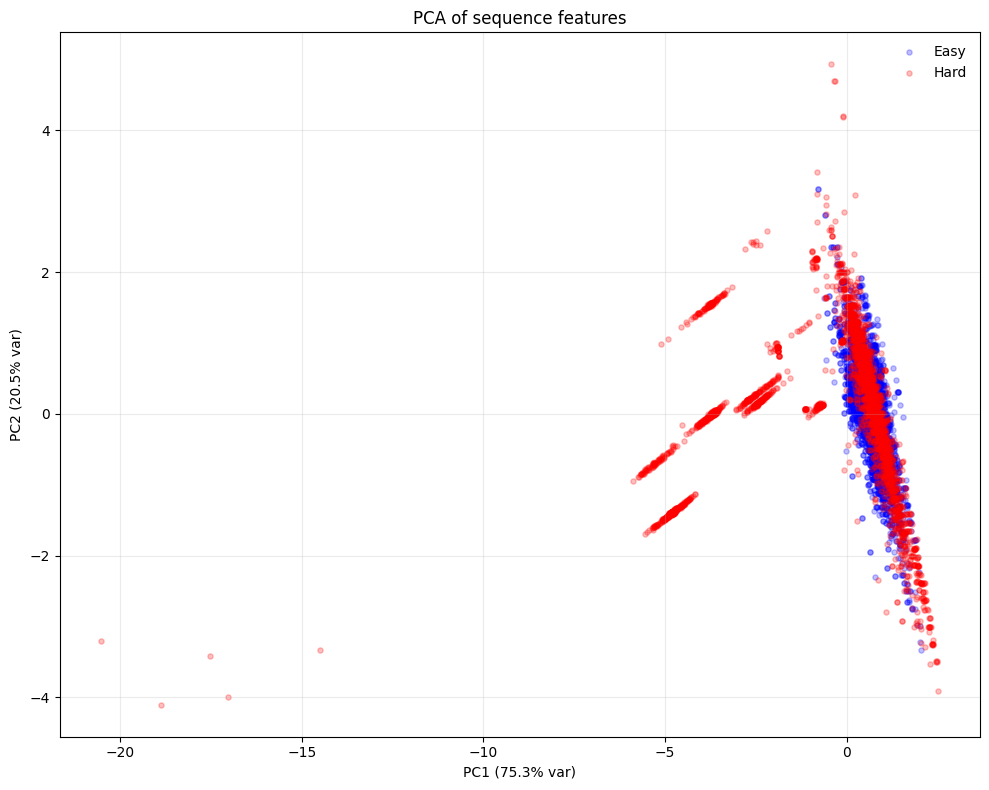

array([[-0.55207288,  0.55718149, -0.54044536, -0.30443904],
       [-0.27675573,  0.03563535, -0.20857357,  0.9373545 ]])

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Columns to use
features = ["length", "mfe", "ens_def", "gc_content"]

# Combine and label
df_all = pd.concat(
    [
        easy_df.assign(_label="Easy"),
        hard_df.assign(_label="Hard"),
    ],
    ignore_index=True
)

# Keep only rows with all required features present
X = df_all[features].astype(float)
mask = X.notna().all(axis=1)
X = X.loc[mask]
y = df_all.loc[mask, "_label"]

# Standardize features (very important for PCA)
X_scaled = StandardScaler().fit_transform(X)

# PCA to 2D
pca = PCA(n_components=2)
Z = pca.fit_transform(X_scaled)
pc1_var, pc2_var = pca.explained_variance_ratio_

# Prepare a DataFrame for plotting (optional)
plot_df = pd.DataFrame(
    {"PC1": Z[:, 0], "PC2": Z[:, 1], "label": y.values},
    index=X.index
)

# Plot (blue for Easy, red for Hard)
fig, ax = plt.subplots(figsize=(10, 8))
for label, color in [("Easy", "blue"), ("Hard", "red")]:
    m = plot_df["label"] == label
    ax.scatter(plot_df.loc[m, "PC1"], plot_df.loc[m, "PC2"],
               s=14, alpha=0.25, label=label, c=color)

ax.set_xlabel(f"PC1 ({pc1_var*100:.1f}% var)")
ax.set_ylabel(f"PC2 ({pc2_var*100:.1f}% var)")
ax.set_title("PCA of sequence features")
ax.legend(frameon=False)
ax.grid(alpha=0.25)
plt.tight_layout()
plt.show()

pca.components_


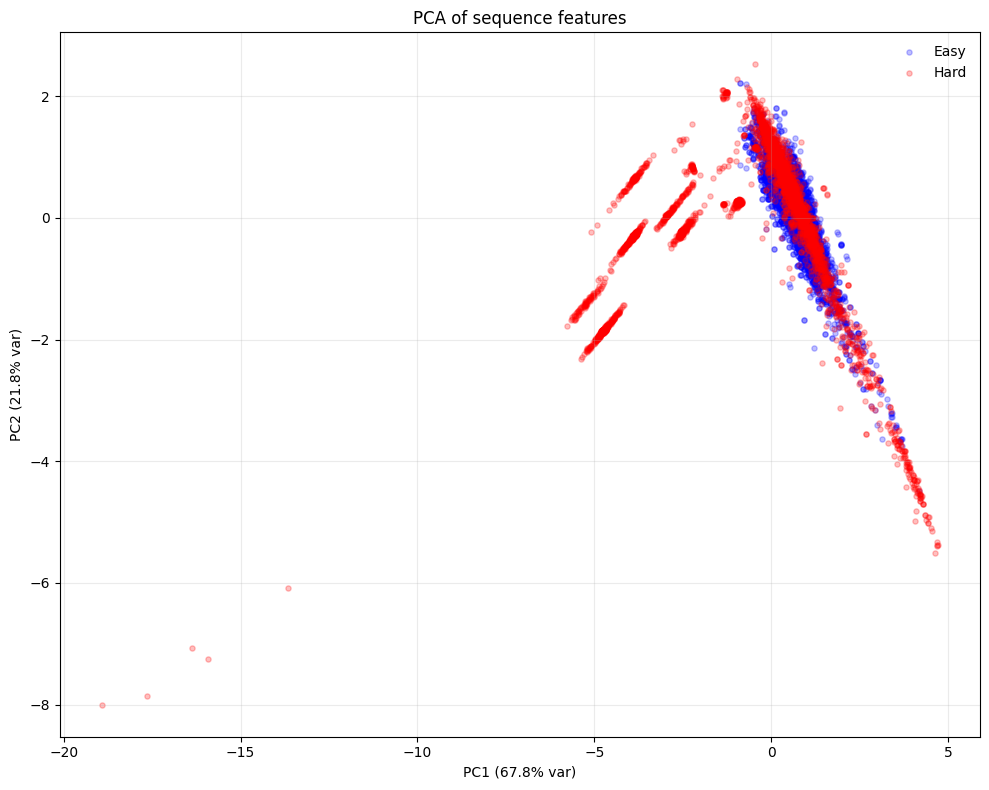

[[-0.4948701   0.52073677 -0.48444825 -0.33273336 -0.37220317]
 [-0.37220387  0.14614964 -0.33450484  0.64730945  0.55605894]]


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Columns to use
features = ["length", "mfe", "ens_def", "gc_content", "sequence_entropy"]

# Combine and label
df_all = pd.concat(
    [
        easy_df.assign(_label="Easy"),
        hard_df.assign(_label="Hard"),
    ],
    ignore_index=True
)

# Keep only rows with all required features present
X = df_all[features].astype(float)
mask = X.notna().all(axis=1)
X = X.loc[mask]
y = df_all.loc[mask, "_label"]

# Standardize features (very important for PCA)
X_scaled = StandardScaler().fit_transform(X)

# PCA to 2D
pca = PCA(n_components=2)
Z = pca.fit_transform(X_scaled)
pc1_var, pc2_var = pca.explained_variance_ratio_

# Prepare a DataFrame for plotting (optional)
plot_df = pd.DataFrame(
    {"PC1": Z[:, 0], "PC2": Z[:, 1], "label": y.values},
    index=X.index
)

# Plot (blue for Easy, red for Hard)
fig, ax = plt.subplots(figsize=(10, 8))
for label, color in [("Easy", "blue"), ("Hard", "red")]:
    m = plot_df["label"] == label
    ax.scatter(plot_df.loc[m, "PC1"], plot_df.loc[m, "PC2"],
               s=14, alpha=0.25, label=label, c=color)

ax.set_xlabel(f"PC1 ({pc1_var*100:.1f}% var)")
ax.set_ylabel(f"PC2 ({pc2_var*100:.1f}% var)")
ax.set_title("PCA of sequence features")
ax.legend(frameon=False)
ax.grid(alpha=0.25)
plt.tight_layout()
plt.show()

print(pca.components_)


In [18]:
models = ['ContextFold',
 'ContraFold',
 'EternaFold',
 'IPKnot',
 'NeuralFold',
 'NUPACK',
 'RNAFold',
 'RNAStructure',
 'pKnots',
 'Simfold',
 'MXFold',
 'MXFold2',
 'SPOT-RNA']


score_cols = [f"{m}_accuracy" for m in models if f"{m}_accuracy" in easy_df.columns]
easy_df["avg_accuracy"] = easy_df[score_cols].apply(pd.to_numeric, errors="coerce").mean(axis=1)


In [19]:
score_cols = [f"{m}_accuracy" for m in models if f"{m}_accuracy" in hard_df.columns]
hard_df["avg_accuracy"] = hard_df[score_cols].apply(pd.to_numeric, errors="coerce").mean(axis=1)

In [20]:
hard_df

,dataset,datapoint,sequence,ContextFold_accuracy,ContextFold_prediction,ContraFold_accuracy,ContraFold_prediction,EternaFold_accuracy,EternaFold_prediction,IPKnot_accuracy,...,MXFold2_accuracy,MXFold2_prediction,SPOT-RNA_accuracy,SPOT-RNA_prediction,mfe,ens_def,sequence_entropy,gc_content,length,avg_accuracy
0,EternaData,ETCROS_VN1_0001_ANNOTATION_9,GGGCCGGCUCGAGCCCAGCCCGGAAACGGGCUGGCCAGAGAUAGCG...,0.662879,.....(((((((((((((((((....))))))))(((((((((......,0.662879,.....(((((((((((((((((....))))))))(((((((((......,0.662879,.....(((((((((((((((((....))))))))(((((((((......,0.662879,...,0.662879,.....(((((((((((((((((....))))))))(((((((((......,0.660526,.....(((((((((((((((((....))))))))(((((((((......,-70.0,0.19,0.938412,0.657143,105,0.652931
1,EternaData,ETERNA_R00_0000_ANNOTATION_1031,GGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACUAGAUAAAAGCUA...,0.612414,................................((((((....((((...,0.649866,................................(((((((...((((...,0.649866,................................(((((((...((((...,0.649866,...,0.649866,................................(((((((...((((...,0.620553,................................(((((((...((((...,-24.5,0.39,0.783623,0.261682,107,0.644480
2,EternaData,ETERNA_R00_0000_ANNOTATION_1036,GGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACUAUGUUCCCAUAG...,0.549310,................................(((((((....(((...,0.550067,................................(((((((...((((...,0.550067,................................(((((((...((((...,0.550067,...,0.550067,................................(((((((...((((...,0.560526,...............................(((((......))))...,-20.8,0.88,0.839285,0.308411,107,0.553276
3,EternaData,ETERNA_R00_0000_ANNOTATION_1100,GGAAAAAAAAAAGCUGAGUACGAAGUACAGCACGAAGUGCAGAGCA...,0.590412,............((((.............((((...)))).((((....,0.633721,............((((..(((...)))))))((...))((.((((....,0.610788,............(((..((((...)))))))((...))((.((((....,0.638782,...,0.601634,............((((.((((...)))).((((...)))).((((....,0.592424,......................(......((((...)))).((((....,-28.4,2.42,0.919512,0.467290,107,0.611771
4,EternaData,ETERNA_R00_0000_ANNOTATION_1125,GGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGA...,0.661458,............................................((...,0.661458,............................................((...,0.661458,............................................((...,0.661458,...,0.661458,............................................((...,0.595825,............................................((...,-14.9,0.11,0.640772,0.224299,107,0.651694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4418,Ribonanza,fe95df322221,GGGAACGACUCGAGUAGAGUCGAAAAAUACUUACCUGGCAGGGGAG...,0.641496,(((.....))).....((((.................(((((((.....,0.562243,.....((((((.....))))))...............(((.(((((...,0.567669,.....((((((.....))))))................(..(((((...,0.535517,...,0.587200,(....((((((.....))))))...............(((((((((...,0.552111,.....((((((.....))))))...............(....((.....,-80.5,42.81,0.996235,0.508547,234,0.563199
4419,Ribonanza,feca3f8b8b42,GGGAACGACUCGAGUAGAGUCGAACCAAGCUCAGUUGCCGGGCGGG...,0.608733,(((..((((((.....)))))).......))).(((.(((.(((((...,0.546738,.((..((((((.....))))))..))..........((((((((((...,0.583196,((...((((((.....))))))..))..........((((((((((...,0.667680,...,0.621479,((...((((((.....))))))..)).......(((((((((((((...,0.589929,.....((((((.....))))))..................(........,-112.4,45.03,0.977006,0.618321,262,0.593453
4420,Ribonanza,fed077d8381c,GGGAACGACUCGAGUAGAGUCGAAAAGGUCAAUGAUGAAUGGUAAA...,0.594983,((((..(((((.....)))))............................,0.556127,.....((((((.....))))))....((((.....((((((((......,0.576481,.....((((((.....))))))....((((...(.((((((((......,0.574192,...,0.557779,.....((((((.....))))))....((((...(.((((((((......,0.619592,.....((((((.....))))))....((((...............(...,-116.5,45.62,0.998890,0.510448,335,0.573887
4421,Ribonanza,fef4013abae1,GGAAACAAACAAACCGGAGGGAAAAGUUAUCAGGCAUGCACCUGGU...,0.600680,....

In [37]:
print(hard_df["avg_accuracy"].max())
print(easy_df["avg_accuracy"].min())

0.6662824186179245
0.8704382474285068


In [55]:
low_threshold = 0.65  # set your cutoff

hard_low = hard_df[hard_df["avg_accuracy"] > low_threshold].copy()

# hard_low = hard_low.reset_index(drop=True)
n_low = len(hard_low)
print(n_low)

hi_threshold = 0.9

easy_hi = easy_df[easy_df["avg_accuracy"] < hi_threshold].copy()
n_hi = len(easy_hi)
print(n_hi)

176
176


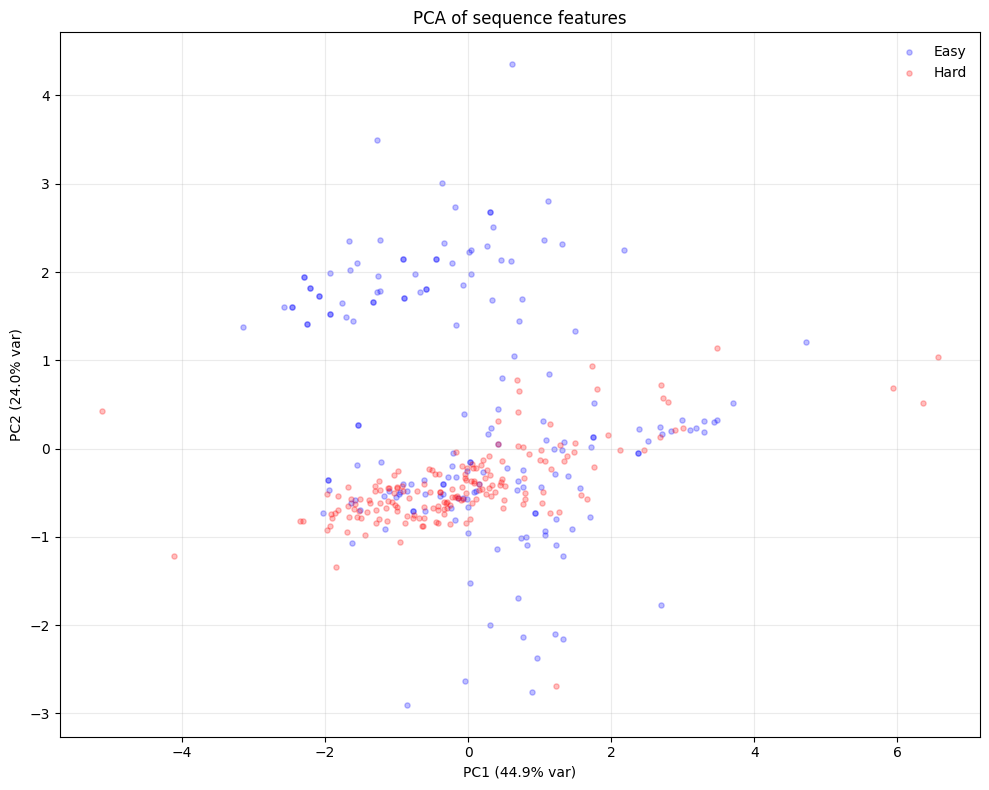

array([[-0.21683269,  0.59328475,  0.08438182, -0.55066611, -0.53911347],
       [ 0.80181471, -0.1930895 ,  0.44672724, -0.31641467, -0.14186662]])

In [56]:
# Columns to use
features = ["length", "mfe", "ens_def", "gc_content", "sequence_entropy"]

# Combine and label
df_all = pd.concat(
    [
        easy_hi.assign(_label="Easy"),
        hard_low.assign(_label="Hard"),
    ],
    ignore_index=True
)

# Keep only rows with all required features present
X = df_all[features].astype(float)
mask = X.notna().all(axis=1)
X = X.loc[mask]
y = df_all.loc[mask, "_label"]

# Standardize features (very important for PCA)
X_scaled = StandardScaler().fit_transform(X)

# PCA to 2D
pca = PCA(n_components=2)
Z = pca.fit_transform(X_scaled)
pc1_var, pc2_var = pca.explained_variance_ratio_

# Prepare a DataFrame for plotting (optional)
plot_df = pd.DataFrame(
    {"PC1": Z[:, 0], "PC2": Z[:, 1], "label": y.values},
    index=X.index
)

# Plot (blue for Easy, red for Hard)
fig, ax = plt.subplots(figsize=(10, 8))
for label, color in [("Easy", "blue"), ("Hard", "red")]:
    m = plot_df["label"] == label
    ax.scatter(plot_df.loc[m, "PC1"], plot_df.loc[m, "PC2"],
               s=14, alpha=0.25, label=label, c=color)

ax.set_xlabel(f"PC1 ({pc1_var*100:.1f}% var)")
ax.set_ylabel(f"PC2 ({pc2_var*100:.1f}% var)")
ax.set_title("PCA of sequence features")
ax.legend(frameon=False)
ax.grid(alpha=0.25)
plt.tight_layout()
plt.show()

pca.components_


In [62]:
low_threshold = 0.55  # set your cutoff

hard_low = hard_df[hard_df["avg_accuracy"] < low_threshold].copy()

# hard_low = hard_low.reset_index(drop=True)
n_low = len(hard_low)
print(n_low)

hi_threshold = 0.98

easy_hi = easy_df[easy_df["avg_accuracy"] > hi_threshold].copy()
n_hi = len(easy_hi)
print(n_hi)




329
363


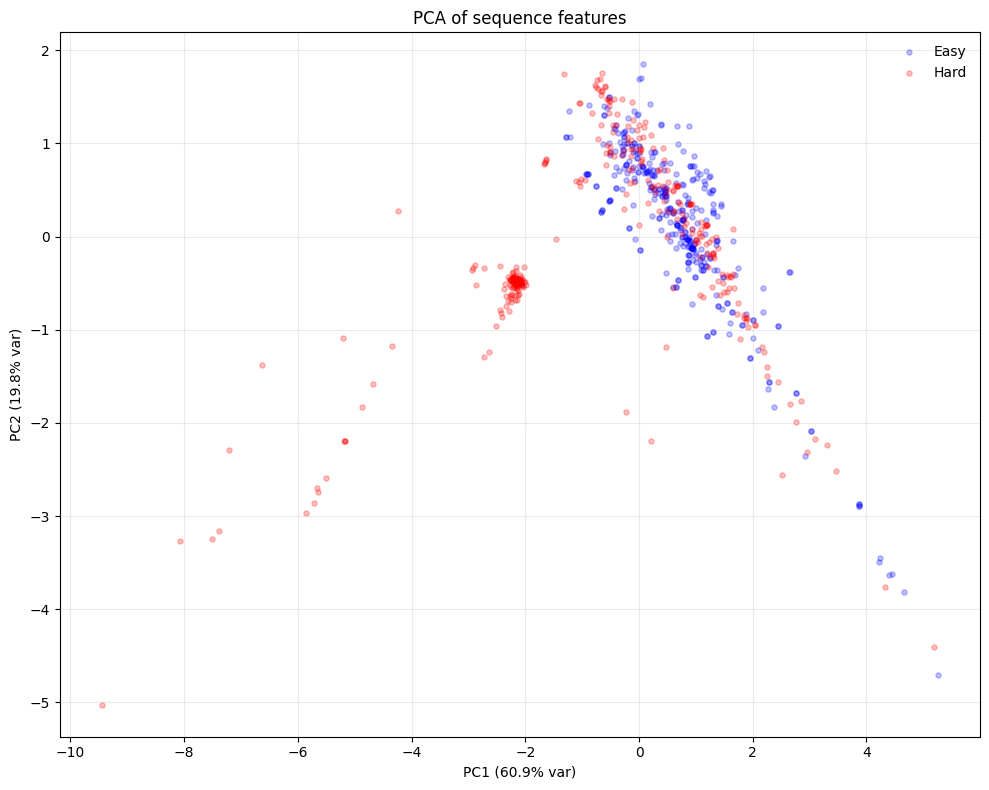

array([[-0.48059331,  0.52498697, -0.40336013, -0.41098153, -0.40226054],
       [-0.44201635,  0.04900167, -0.48152436,  0.48757937,  0.57673306]])

In [63]:
# Columns to use
features = ["length", "mfe", "ens_def", "gc_content", "sequence_entropy"]

# Combine and label
df_all = pd.concat(
    [
        easy_hi.assign(_label="Easy"),
        hard_low.assign(_label="Hard"),
    ],
    ignore_index=True
)

# Keep only rows with all required features present
X = df_all[features].astype(float)
mask = X.notna().all(axis=1)
X = X.loc[mask]
y = df_all.loc[mask, "_label"]

# Standardize features (very important for PCA)
X_scaled = StandardScaler().fit_transform(X)

# PCA to 2D
pca = PCA(n_components=2)
Z = pca.fit_transform(X_scaled)
pc1_var, pc2_var = pca.explained_variance_ratio_

# Prepare a DataFrame for plotting (optional)
plot_df = pd.DataFrame(
    {"PC1": Z[:, 0], "PC2": Z[:, 1], "label": y.values},
    index=X.index
)

# Plot (blue for Easy, red for Hard)
fig, ax = plt.subplots(figsize=(10, 8))
for label, color in [("Easy", "blue"), ("Hard", "red")]:
    m = plot_df["label"] == label
    ax.scatter(plot_df.loc[m, "PC1"], plot_df.loc[m, "PC2"],
               s=14, alpha=0.25, label=label, c=color)

ax.set_xlabel(f"PC1 ({pc1_var*100:.1f}% var)")
ax.set_ylabel(f"PC2 ({pc2_var*100:.1f}% var)")
ax.set_title("PCA of sequence features")
ax.legend(frameon=False)
ax.grid(alpha=0.25)
plt.tight_layout()
plt.show()

pca.components_


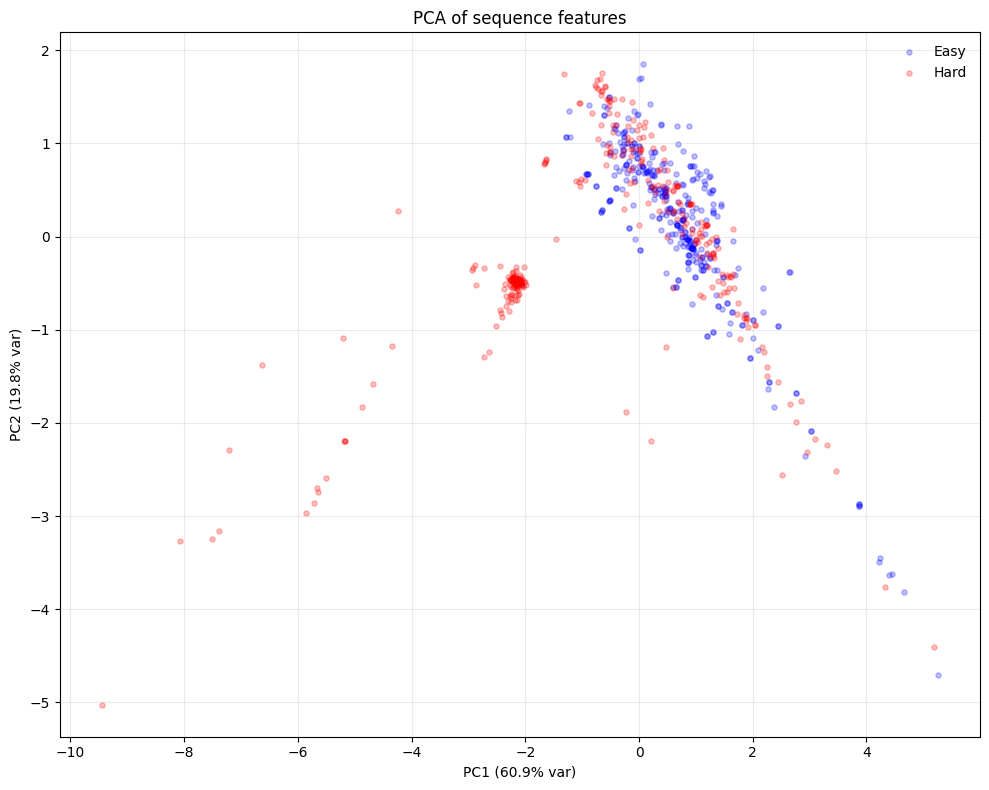

array([[-0.48059331,  0.52498697, -0.40336013, -0.41098153, -0.40226054],
       [-0.44201635,  0.04900167, -0.48152436,  0.48757937,  0.57673306]])

In [64]:
# Columns to use
features = ["length", "mfe", "ens_def", "gc_content", "sequence_entropy"]

# Combine and label
df_all = pd.concat(
    [
        easy_hi.assign(_label="Easy"),
        hard_low.assign(_label="Hard"),
    ],
    ignore_index=True
)

# Keep only rows with all required features present
X = df_all[features].astype(float)
mask = X.notna().all(axis=1)
X = X.loc[mask]
y = df_all.loc[mask, "_label"]

# Standardize features (very important for PCA)
X_scaled = StandardScaler().fit_transform(X)

# PCA to 2D
pca = PCA(n_components=2)
Z = pca.fit_transform(X_scaled)
pc1_var, pc2_var = pca.explained_variance_ratio_

# Prepare a DataFrame for plotting (optional)
plot_df = pd.DataFrame(
    {"PC1": Z[:, 0], "PC2": Z[:, 1], "label": y.values},
    index=X.index
)

# Plot (blue for Easy, red for Hard)
fig, ax = plt.subplots(figsize=(10, 8))
for label, color in [("Easy", "blue"), ("Hard", "red")]:
    m = plot_df["label"] == label
    ax.scatter(plot_df.loc[m, "PC1"], plot_df.loc[m, "PC2"],
               s=14, alpha=0.25, label=label, c=color)

ax.set_xlabel(f"PC1 ({pc1_var*100:.1f}% var)")
ax.set_ylabel(f"PC2 ({pc2_var*100:.1f}% var)")
ax.set_title("PCA of sequence features")
ax.legend(frameon=False)
ax.grid(alpha=0.25)
plt.tight_layout()
plt.show()

pca.components_


In [65]:
df_all

,dataset,datapoint,sequence,ContextFold_accuracy,ContextFold_prediction,ContraFold_accuracy,ContraFold_prediction,EternaFold_accuracy,EternaFold_prediction,IPKnot_accuracy,...,MXFold2_prediction,SPOT-RNA_accuracy,SPOT-RNA_prediction,mfe,ens_def,sequence_entropy,gc_content,length,avg_accuracy,_label
0,EternaData,ETERNA_R30_0001_ANNOTATION_10,GGAAAGGUAUCCAAGACAGUCAAAAGACAGUCAAAGUACAAAGAAC...,0.956364,......((((((..(((.(((....))).)))...(((....((((...,1.000000,.....(((((((..(((.(((....))).)))...((((...((((...,1.000000,.....(((((((..(((.(((....))).)))...((((...((((...,1.000000,...,.....(((((((..(((.(((....))).)))...((((...((((...,1.000000,.....(((((((..(((.(((....))).)))...((((...((((...,-22.0,0.17,0.847369,0.355556,90,0.991142,Easy
1,EternaData,ETERNA_R30_0001_ANNOTATION_9,GGAAAGGUAUCCAAGACAGUCAAAAGACAGUCAAAGUACAAAGAAC...,0.943636,......((((((..(((.(((....))).)))...(((....((((...,0.993789,.....(((((((..(((.(((....))).)))...((((...((((...,0.993789,.....(((((((..(((.(((....))).)))...((((...((((...,0.993789,...,.....(((((((..(((.(((....))).)))...((((...((((...,0.993789,.....(((((((..(((.(((....))).)))...((((...((((...,-22.0,0.17,0.847369,0.355556,90,0.982483,Easy
2,EternaData,ETERNA_R45_0001_ANNOTATION_10,GGAAAGUCAGACCGACAGUCGAAAGACUGUCGUGGAGGAUAUCACG...,0.986772,.....(((((((((((((((....))))))))(((......((((....,0.986772,.....(((((((((((((((....)))))))((((......((((....,0.986772,.....(((((((((((((((....)))))))((((......((((....,0.986772,...,.....(((((((((((((((....)))))))((((......((((....,0.986772,.....(((((((((((((((....))))))))(((......((((....,-49.7,0.32,0.938820,0.500000,108,0.987396,Easy
3,EternaData,ETERNA_R45_0001_ANNOTATION_11,GGAAAGUCAGACCGACAGUCGAAAGACUGUCGUGGAGGAUAUCACG...,0.986772,.....(((((((((((((((....))))))))(((......((((....,0.986772,.....(((((((((((((((....)))))))((((......((((....,0.986772,.....(((((((((((((((....)))))))((((......((((....,0.986772,...,.....(((((((((((((((....)))))))((((......((((....,0.986772,.....(((((((((((((((....))))))))(((......((((....,-49.7,0.32,0.938820,0.500000,108,0.987001,Easy
4,EternaData,ETERNA_R69_0000_ANNOTATION_19,GGAAAAGUACUAAUUAACAUCAACUAUGAAUUAACUGAACACAGUU...,0.984051,......((((((((((((....(.((((((((((((......))))...,0.989982,......((((((((((((((....(((((((((((((....)))))...,0.989982,......((((((((((((((....(((((((((((((....)))))...,0.989982,...,......((((((((((((((....(((((((((((((....)))))...,0.987103,......((((((((((((((....(((((((((((((....)))))...,-38.9,0.26,0.909672,0.289720,107,0.983392,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,Ribonanza,f2590cf27561,GGGAACGACUCGAGUAGAGUCGAAAAGCGAUAUGGAUAGAAGGACG...,0.548139,......(((((.....))))).....(((((..((((((..........,0.524369,.....((((((.....))))))....(((((..((((((....((....,0.524369,.....((((((.....))))))....(((((..((((((....((....,0.571008,...,.....((((((.....))))))....(((((..((((((..(.((....,0.531549,.....((((((.....))))))............(((((..........,-67.0,9.74,0.964278,0.452261,199,0.537331,Hard
688,Ribonanza,f5ab849cc3f4,GGGAAGGACUCGAGUAGAGUCGAAAAGCGAUAUGGAUAGAAGGACG...,0.555011,......(((((.....))))).....(((((..((((((..........,0.515364,......(((((.....))))).....(((((..((((((....((....,0.515364,......(((((.....))))).....(((((..((((((....((....,0.556432,...,......(((((.....))))).....(((((..((((((..(.((....,0.535780,......(((((.....)))))............((((((..........,-68.6,6.15,0.964278,0.452261,199,0.531413,Hard
689,Ribonanza,f60369991cb8,GGGAACGACUCGAGUAGAGUCGAAAAGCGAUAUGGAUAGAAGGACG...,0.567961,......(((((.....))))).....(((((..((((((..........,0.551126,.....((((((.....))))))....(((((..((((((....((....,0.541107,.....((((((.....))))))....(((((..((((((....((....,0.583738,...,.....((((((.....))))))....(((((..((((((..(.((....,0.548950,.....((((((.....))))))........(((((..............,-66.1,6.48,0.962873,0.452261,199,0.548268,Hard
690,Ribonanza,fa37bb3a18b0,GGGAACGACUCGAGUAGAGUCGAAAAGGUCAAUGAUGAAUGGUAAA...,0.550488,......(((((.....))))).....((((......((((((.......,0.527841,.....(

In [66]:
hard_df

,dataset,datapoint,sequence,ContextFold_accuracy,ContextFold_prediction,ContraFold_accuracy,ContraFold_prediction,EternaFold_accuracy,EternaFold_prediction,IPKnot_accuracy,...,MXFold2_accuracy,MXFold2_prediction,SPOT-RNA_accuracy,SPOT-RNA_prediction,mfe,ens_def,sequence_entropy,gc_content,length,avg_accuracy
0,EternaData,ETCROS_VN1_0001_ANNOTATION_9,GGGCCGGCUCGAGCCCAGCCCGGAAACGGGCUGGCCAGAGAUAGCG...,0.662879,.....(((((((((((((((((....))))))))(((((((((......,0.662879,.....(((((((((((((((((....))))))))(((((((((......,0.662879,.....(((((((((((((((((....))))))))(((((((((......,0.662879,...,0.662879,.....(((((((((((((((((....))))))))(((((((((......,0.660526,.....(((((((((((((((((....))))))))(((((((((......,-70.0,0.19,0.938412,0.657143,105,0.652931
1,EternaData,ETERNA_R00_0000_ANNOTATION_1031,GGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACUAGAUAAAAGCUA...,0.612414,................................((((((....((((...,0.649866,................................(((((((...((((...,0.649866,................................(((((((...((((...,0.649866,...,0.649866,................................(((((((...((((...,0.620553,................................(((((((...((((...,-24.5,0.39,0.783623,0.261682,107,0.644480
2,EternaData,ETERNA_R00_0000_ANNOTATION_1036,GGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACUAUGUUCCCAUAG...,0.549310,................................(((((((....(((...,0.550067,................................(((((((...((((...,0.550067,................................(((((((...((((...,0.550067,...,0.550067,................................(((((((...((((...,0.560526,...............................(((((......))))...,-20.8,0.88,0.839285,0.308411,107,0.553276
3,EternaData,ETERNA_R00_0000_ANNOTATION_1100,GGAAAAAAAAAAGCUGAGUACGAAGUACAGCACGAAGUGCAGAGCA...,0.590412,............((((.............((((...)))).((((....,0.633721,............((((..(((...)))))))((...))((.((((....,0.610788,............(((..((((...)))))))((...))((.((((....,0.638782,...,0.601634,............((((.((((...)))).((((...)))).((((....,0.592424,......................(......((((...)))).((((....,-28.4,2.42,0.919512,0.467290,107,0.611771
4,EternaData,ETERNA_R00_0000_ANNOTATION_1125,GGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGA...,0.661458,............................................((...,0.661458,............................................((...,0.661458,............................................((...,0.661458,...,0.661458,............................................((...,0.595825,............................................((...,-14.9,0.11,0.640772,0.224299,107,0.651694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4418,Ribonanza,fe95df322221,GGGAACGACUCGAGUAGAGUCGAAAAAUACUUACCUGGCAGGGGAG...,0.641496,(((.....))).....((((.................(((((((.....,0.562243,.....((((((.....))))))...............(((.(((((...,0.567669,.....((((((.....))))))................(..(((((...,0.535517,...,0.587200,(....((((((.....))))))...............(((((((((...,0.552111,.....((((((.....))))))...............(....((.....,-80.5,42.81,0.996235,0.508547,234,0.563199
4419,Ribonanza,feca3f8b8b42,GGGAACGACUCGAGUAGAGUCGAACCAAGCUCAGUUGCCGGGCGGG...,0.608733,(((..((((((.....)))))).......))).(((.(((.(((((...,0.546738,.((..((((((.....))))))..))..........((((((((((...,0.583196,((...((((((.....))))))..))..........((((((((((...,0.667680,...,0.621479,((...((((((.....))))))..)).......(((((((((((((...,0.589929,.....((((((.....))))))..................(........,-112.4,45.03,0.977006,0.618321,262,0.593453
4420,Ribonanza,fed077d8381c,GGGAACGACUCGAGUAGAGUCGAAAAGGUCAAUGAUGAAUGGUAAA...,0.594983,((((..(((((.....)))))............................,0.556127,.....((((((.....))))))....((((.....((((((((......,0.576481,.....((((((.....))))))....((((...(.((((((((......,0.574192,...,0.557779,.....((((((.....))))))....((((...(.((((((((......,0.619592,.....((((((.....))))))....((((...............(...,-116.5,45.62,0.998890,0.510448,335,0.573887
4421,Ribonanza,fef4013abae1,GGAAACAAACAAACCGGAGGGAAAAGUUAUCAGGCAUGCACCUGGU...,0.600680,....